# Домашнее задание.
Рассмотрим граф  G=(V,E), вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1.

Оценить, сколько в среднем закрашенных вершин будет иметь такой граф.

Сформулируем задачу в математических терминах.

Пусть ξ∈{0,1} обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть ZG - общее количество допустимых конфигураций. Зададим распределение на множестве всех конфигураций:

μ(ξ)={ 1/ZG, ξ - допустимая конфигурация; 0 - иначе }.

Обозначим n(ξ) - число закрашенных вершин в конфигурации ξ.

Задание

1) Оценить  En(ξ)  с помощью МСМС для графа 8х8

2) Обосновать численно и графически стационарность

3) Построить график распределения  n(ξ)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [87]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        if value(**kwargs) == 1:
            current = proposed
        post.append(int(np.sum(current)))
    plot_grid(current.astype('bool'))
    return post[nburn:]

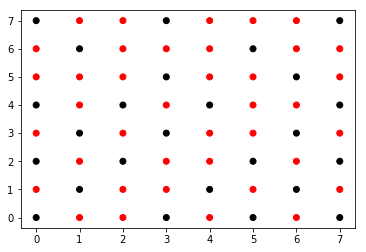

In [90]:
def value(**kwargs):
    _ = kwargs
    return np.random.choice([0, 1])


def proposal(current, **kwargs):
    _ = kwargs
    i = np.random.choice(8,2)
    
    s=0
    if i[0]!=0:
        s+=current[i[0]-1][i[1]]
    if i[0]!=7:
        s+=current[i[0]+1][i[1]]
    if i[1]!=0:
        s+=current[i[0]][i[1]-1]
    if i[1]!=7:
        s+=current[i[0]][i[1]+1]
    
    if s==0:
        current[i[0]][i[1]] = 1
    else:
        current[i[0]][i[1]] = 0
    return current

size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size))

post = metroplis(np.zeros((8,8)), value, proposal, 1000)

In [91]:
print("Оценка количества закрашенных вершин в графе: ")
print(sum(post)/len(post))

Оценка количества закрашенных вершин в графе: 
23.853146853146853


In [92]:
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

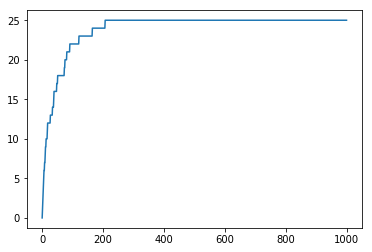

Ttest_indResult(statistic=-0.9999999999998654, pvalue=0.3204027325541801)

In [109]:
#Из численных и графических данных можно сделать вывод о стационарности
from scipy import stats
plt.plot(post)
plt.show()

g_test(post[206:1000])

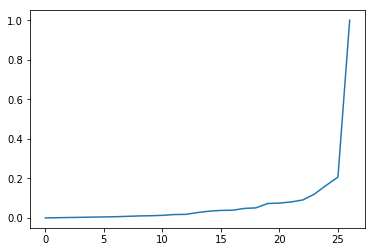

In [110]:
#График распределения числа закрашенных вершин
u = np.unique(np.array(post))
P = [(np.array(post)==i).sum() for i in u]
P/=sum(P)
F = [P[:i].sum() for i in range(len(P)+1)]
plt.plot(F)
plt.show()